### Question:
InnovateIQ Corporation is a technology company specializing in medical instrument based in New York. Attrition is a significant concern for InnovateIQ Corporation as it can lead to a loss of valuable talent and increased recruitment costs. As a data scientist at InnovateIQ Corporation, your task is to generate a machine learning model to predict attrition of employees using historical data, including employee demographic information and job-related details, and evaluate the model's performance using appropriate metrics. 

- Response Variable: Attrition

Task
1. generate a machine learning model to predict attrition of employees using historical data
2. employee demographic information and job-related details
3. evaluate the model's performance using appropriate metrics

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

In [2]:
#import dataset

df = pd.read_csv('project_dataset.csv',index_col=['EmployeeID'])

df.head(10)

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No
8,32,Travel_Frequently,3068,4,9204,Research & Development,2,2,Life Sciences,4,Male,Laboratory Technician,Single,3,2,7,3,No,No
10,59,Travel_Rarely,2670,1,10680,Research & Development,3,3,Medical,3,Female,Laboratory Technician,Married,4,3,1,0,Yes,No
11,30,Travel_Rarely,2693,3,10772,Research & Development,24,1,Life Sciences,4,Male,Laboratory Technician,Divorced,4,2,1,0,No,No
12,38,Travel_Frequently,9526,3,38104,Research & Development,23,3,Life Sciences,4,Male,Manufacturing Director,Single,4,2,9,1,No,No


In [3]:
df.shape

(1470, 19)

In [4]:
df.describe()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,Education,EnvSatisfaction,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,2.728571,20479.501361,9.192517,2.912925,2.721769,3.153741,2.799320,7.008163,2.187755
std,9.135373,4707.956783,1.102846,15066.272964,8.106864,1.024165,1.093082,0.360824,1.289271,6.126525,3.222430
min,18.000000,1009.000000,1.000000,3027.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,2.000000,9333.750000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,36.000000,4919.000000,3.000000,15484.500000,7.000000,3.000000,3.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,8379.000000,4.000000,26103.750000,14.000000,4.000000,4.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,19999.000000,4.000000,79892.000000,29.000000,5.000000,4.000000,4.000000,6.000000,40.000000,15.000000


### Check the data Quality

In [5]:
# Check Number of row and columns
df.shape

(1470, 19)

In [6]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [7]:
# Trace Missing Value

df.isnull().sum()

Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [8]:
#Trace Duplicated Rows
#Check duplicated rows
df[df.duplicated(keep=False)]

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,


# Exploratory Data Analysis

## A. Univariate for Response Variable
### Check the class proportion for Attrition

In [9]:
attrition_count = df['Attrition'].value_counts()

attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

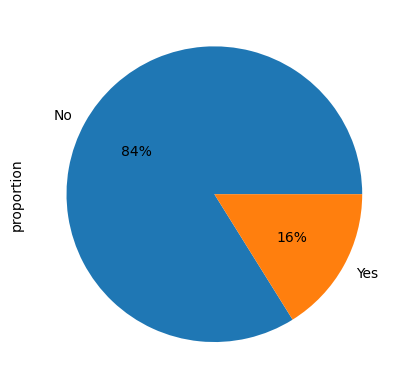

In [10]:
#Class proportion for Attrition
#Pie Chart for Attrition Count
attrition_proportion = df['Attrition'].value_counts(normalize=True)*100
attrition_proportion.plot(kind='pie',autopct='%.0f%%')
plt.show()

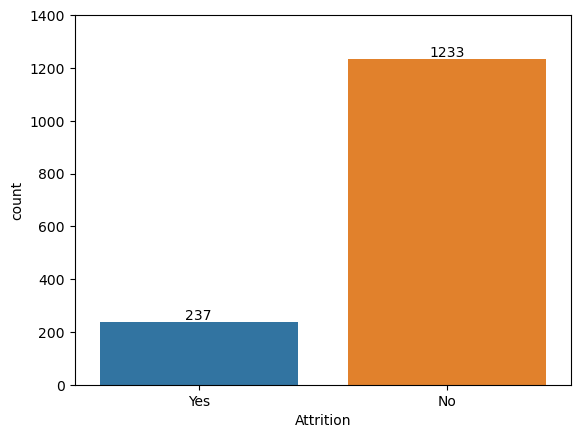

In [11]:
#Class count for Attrition
#Bar Chart for Attrition Count

ax = sns.countplot(data=df,x='Attrition')

for label in ax.containers:
    ax.bar_label(label)


plt.ylim([0,1400])

plt.show()

From the pie chart and the bar chart, we can see that the proportion of Yes and No is imbalance. so when we predict the machine learning modelling, the prediction will perform better on predicting the Yes class. So we need to balance the data using Stratified Sampling in Partitioning later.

### Department proportion

In [12]:
department_count = df['Department'].value_counts()

department_count

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

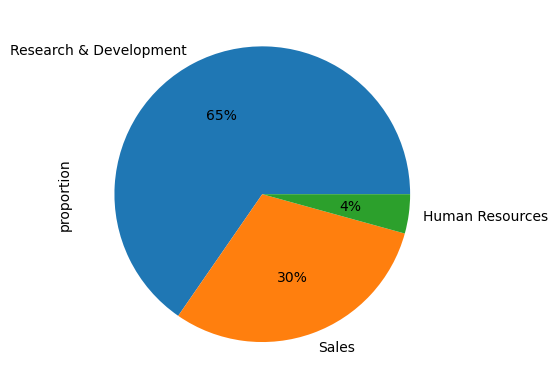

In [13]:
#Class proportion for Department
#Pie Chart for Department Count
department_proportion = df['Department'].value_counts(normalize=True)*100
department_proportion.plot(kind='pie',autopct='%.0f%%')
plt.show()

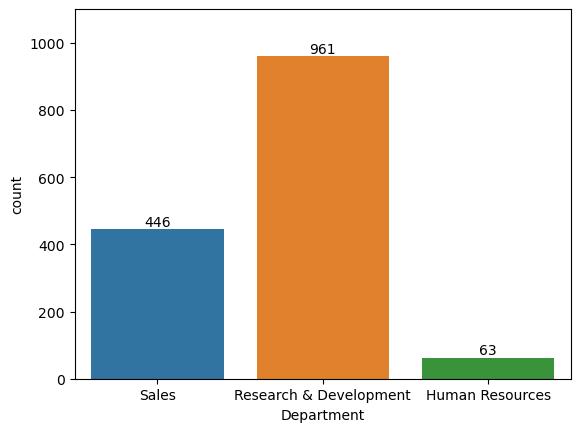

In [14]:
from matplotlib.axes import Axes

ax = sns.countplot(data=df,x='Department')

for label in ax.containers:
    ax.bar_label(label)


plt.ylim([0,1100])
plt.show()

### Age distribution

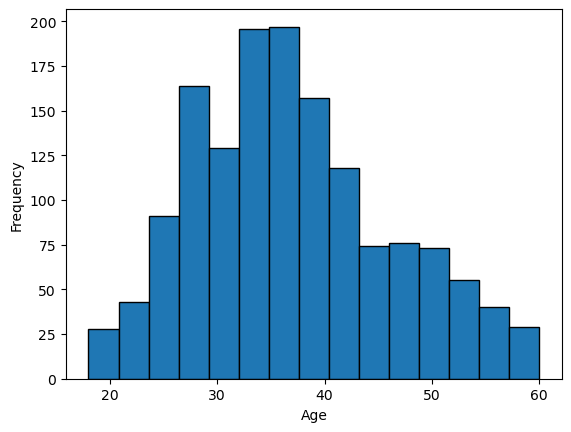

In [15]:
plt.hist(df['Age'],bins=15,edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

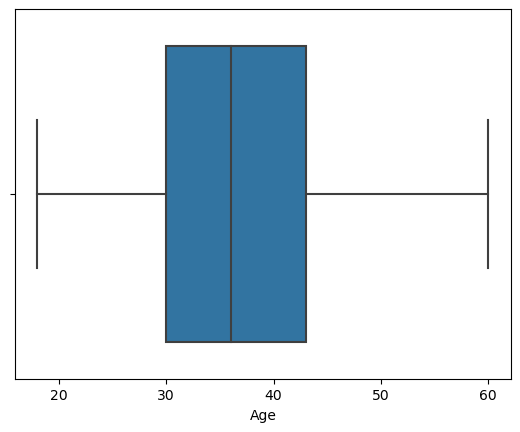

In [16]:
#Box Plot Age
sns.boxplot(x='Age',data=df)
plt.show()

In [17]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

#### Summary of Age distribution
- Median is located slightly to the left. Age is skewed to the right (positive skewed). This means more employees with young age
- 25% of cients with the Age less than 30 years old
- 25% of cients with the Age more than 43 years old
- 50% of clients are with the Age between 30 to 43 years old
- Half of clients are with Age more than 36 years old

## B. Perform Multivariate Analysis for Features Selection

### 1. Does Age affect the Attrition?

In [18]:
#Mean Attrition for Age
meanAttrition_Age = df.groupby('Attrition',as_index=False)['Age'].mean()
meanAttrition_Age.round(2)

,Attrition,Age
0,No,37.56
1,Yes,33.61


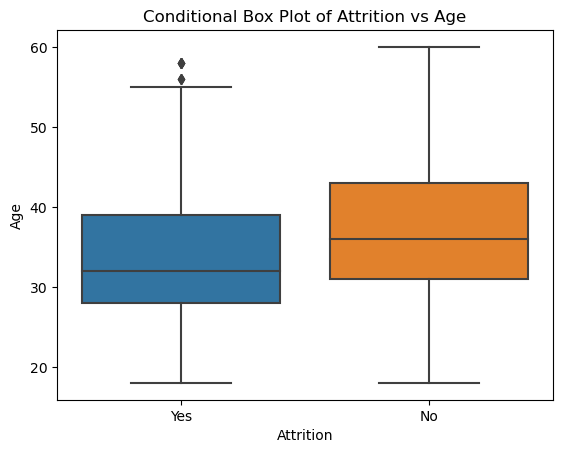

In [19]:
# Conditional Box Plot / Multiple Plot
sns.boxplot(x='Attrition',y='Age',data=df)

plt.title('Conditional Box Plot of Attrition vs Age')
plt.show()

In [20]:
#Levene's Test

stats.levene(df['Age'][df['Attrition']=='No'],
             df['Age'][df['Attrition']=='Yes'],
             center = 'mean')

LeveneResult(statistic=1.1583170677572885, pvalue=0.2819916793250208)

p-value = 0.28 >= 0.05 for Levene's Test indicate that Age variance of Attrition and are equal.

In [21]:
#Significant test using Independent T-Test for mean of Yes and no 
#Independent T-Test function : stats.ttest_ind()

stats.ttest_ind(df['Age'][df['Attrition']=='Yes'],
                df['Age'][df['Attrition']=='No'],
               equal_var=True)

TtestResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10, df=1468.0)

p-value = 0.00 < 0.05 for Independent T-test, indicate that Attrition and Stay has significant difference of Age' mean.

This means that the age is significantly affect the Attrition.

### 2. Does Monthly Income affected the Attrition?

In [22]:
# MEAN Attrition for Monthly Income
meanAttrition_MonthlyIncome = df.groupby('Attrition',as_index=False)['MonthlyIncome'].mean() 
meanAttrition_MonthlyIncome.round(2)

,Attrition,MonthlyIncome
0,No,6832.74
1,Yes,4787.09


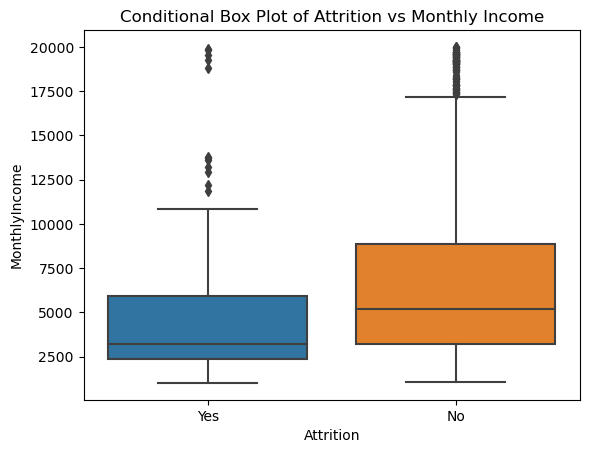

In [23]:
# Conditional Box Plot
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df)

plt.title('Conditional Box Plot of Attrition vs Monthly Income')
plt.show()

In [24]:
#LEVENE TEST

stats.levene(df['MonthlyIncome'][df['Attrition']=='No'],
             df['MonthlyIncome'][df['Attrition']=='Yes'],
             center='mean') 

LeveneResult(statistic=26.31302358992364, pvalue=3.29070575711061e-07)

p-value = 0.00 <0.05 for Levene's Test indicate that Monthly Income variance of Attrition are not equal.

In [25]:
#Independent T-Test function : stats.ttest_ind()

stats.ttest_ind(df['MonthlyIncome'][df['Attrition']=='No'],
                df['MonthlyIncome'][df['Attrition']=='Yes'],
               equal_var=False)

TtestResult(statistic=7.482621586644742, pvalue=4.433588628286071e-13, df=412.74074755747006)

p-value = 0.00 < 0.05 for Independent T-test, indicate that the mean Attrition of employee that have high monthly income is significantly difference with the employee that have low monthly income.

This means that stage of monthly income is significantly affect the Attrition.

### 3. Did Distance from home give an impact to Attrition

In [26]:
# MEAN Attrition for Distance From Home
meanAttrition_DistanceFromHome = df.groupby('Attrition',as_index=False)['DistanceFromHome'].mean()

meanAttrition_DistanceFromHome.round(2)

,Attrition,DistanceFromHome
0,No,8.92
1,Yes,10.63


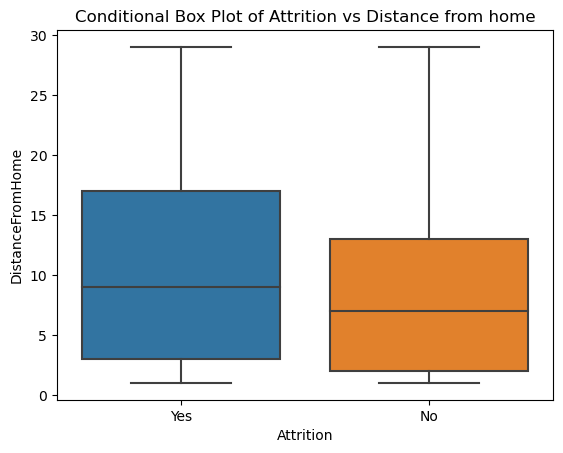

In [27]:
# Conditional Box Plot / Multiple Plot

sns.boxplot(x='Attrition',y='DistanceFromHome',data=df)

plt.title('Conditional Box Plot of Attrition vs Distance from home')
plt.show()

In [28]:
# Hypothesis using ANOVA

stats.f_oneway(df['DistanceFromHome'][df['Attrition']=='No'],
               df['DistanceFromHome'][df['Attrition']=='Yes'])

F_onewayResult(statistic=8.968276593814723, pvalue=0.0027930600802132115)

The P-value of the ANOVA test is 0.003 which is <0.05. In this case we rejected the null hypothesis. The MEAN Attrition of each distance from home is significantly difference.

This means that the distance from home can give significant impact to the Attrition.

### 4. Check if Bonus can influence the Attrition based status

In [29]:
# MEAN Attrition for Bonus
meanAttrition_Bonus = df.groupby('Attrition',as_index=False)['Bonus'].mean()

meanAttrition_Bonus.round(2)

,Attrition,Bonus
0,No,21543.95
1,Yes,14941.67


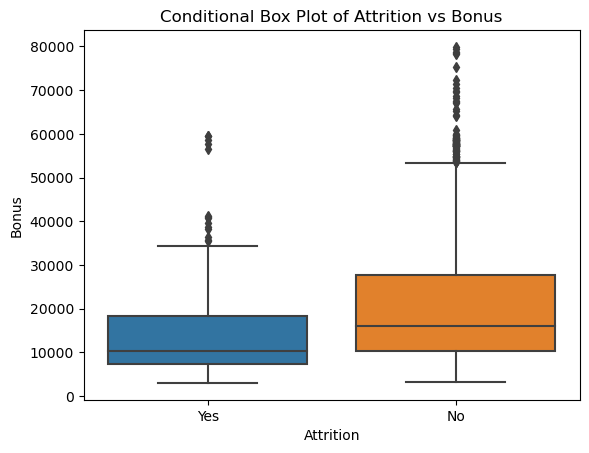

In [30]:
# Conditional Box Plot / Multiple Plot

sns.boxplot(x='Attrition',y='Bonus',data=df)

plt.title('Conditional Box Plot of Attrition vs Bonus')
plt.show()

In [31]:
# Hypothesis using ANOVA

stats.f_oneway(df['Bonus'][df['Attrition']=='No'],
               df['Bonus'][df['Attrition']=='Yes'])

F_onewayResult(statistic=39.1660916334079, pvalue=5.097427592324264e-10)

The P-value of the ANOVA test is 0.00 which is <0.05. In this case we rejected the null hypothesis. The MEAN Attrition of stage of bonus is significantly difference.

This means that the stage of bonus can influence the Attrition.

### 5. Attrition based on Training Times Last Year

In [32]:
# MEAN Attrition for Training Times Last Year
meanAttrition_TTL = df.groupby('Attrition',as_index=False)['TrainingTimesLastYear'].mean()

meanAttrition_TTL.round(2)

,Attrition,TrainingTimesLastYear
0,No,2.83
1,Yes,2.62


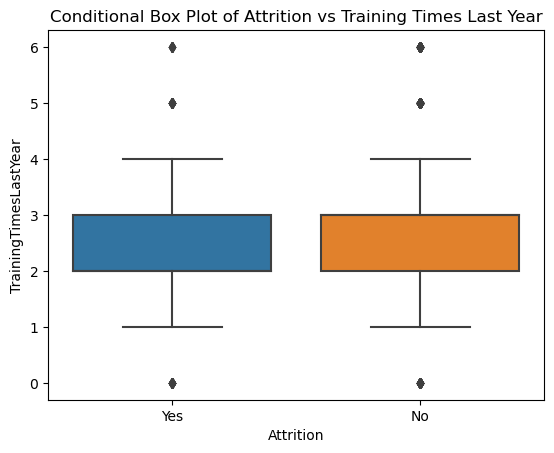

In [33]:
# Conditional Box Plot / Multiple Plot

sns.boxplot(x='Attrition',y='TrainingTimesLastYear',data=df)

plt.title('Conditional Box Plot of Attrition vs Training Times Last Year')
plt.show()

In [34]:
# Hypothesis using ANOVA

stats.f_oneway(df['TrainingTimesLastYear'][df['Attrition']=='No'],
               df['TrainingTimesLastYear'][df['Attrition']=='Yes'])

F_onewayResult(statistic=5.211646072556778, pvalue=0.02257849973719727)

Training times last year can influence the Attrition

### 6. Attrition based on Years At Company

In [35]:
# MEAN Attrition for Years At Company
meanAttrition_YearsAtCompany = df.groupby('Attrition',as_index=False)['YearsAtCompany'].mean() 

meanAttrition_YearsAtCompany

,Attrition,YearsAtCompany
0,No,7.369019
1,Yes,5.130802


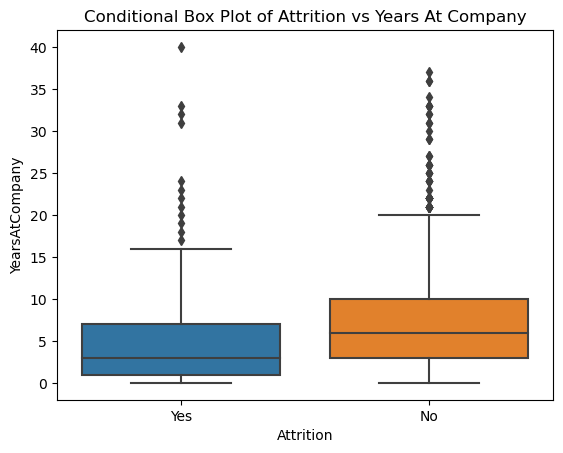

In [36]:
# Conditional Box Plot
sns.boxplot(x='Attrition',y='YearsAtCompany',data=df)

plt.title('Conditional Box Plot of Attrition vs Years At Company')
plt.show()

In [37]:
#LEVENE TEST
#Coding ini boleh pakai pada mana-mana Levene Test. Ubah nama dataframe df @ variable only
stats.levene(df['YearsAtCompany'][df['Attrition']=='No'],
             df['YearsAtCompany'][df['Attrition']=='Yes'],
             center = 'mean')

LeveneResult(statistic=2.5049476586425445, pvalue=0.11370465713766563)

p-value is 0.11 >=0.05 for Levene's Test indicate that Years At Company's variance of Attrition and are equal.

In [38]:
stats.ttest_ind(df['YearsAtCompany'][df['Attrition']=='No'],
                df['YearsAtCompany'][df['Attrition']=='Yes'],
                equal_var=True)

TtestResult(statistic=5.1963086670254235, pvalue=2.3188716103863033e-07, df=1468.0)

Years at company affected Attrition

### 7.Attrition based on Years Since Last Promotion

In [39]:
# MEAN Attrition for Years Since Last Promotion
meanAttrition_YearsSinceLastPromotion = df.groupby('Attrition',as_index=False)['YearsSinceLastPromotion'].mean()

meanAttrition_YearsSinceLastPromotion

,Attrition,YearsSinceLastPromotion
0,No,2.234388
1,Yes,1.945148


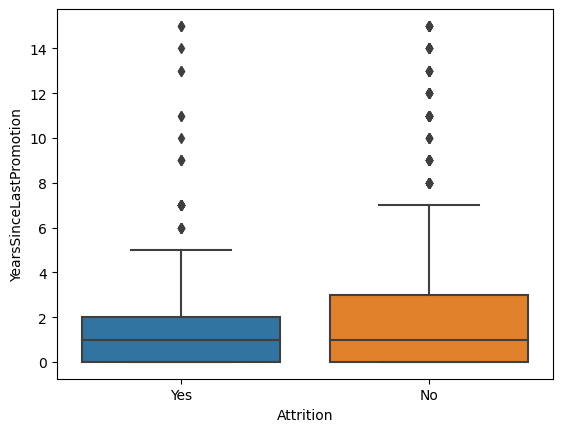

In [40]:
# Conditional Box Plot / Multiple Plot
sns.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.show()

In [41]:
# Hypothesis using ANOVA


stats.f_oneway(df['YearsSinceLastPromotion'][df['Attrition']=='No'],
               df['YearsSinceLastPromotion'][df['Attrition']=='Yes'])

F_onewayResult(statistic=1.6022184053056754, pvalue=0.2057899591624541)

The P-value of the ANOVA test is 0.20 which is >=0.05. This mean we will accept the null hypothesis which is there is no significant difference for the MEAN attrition for years since last promotion.

So the years since last promotion cannot influence the attrition.

### 8.Is there a significant association between BusinessTravel and Attrition.

In [42]:
attr_bt = pd.crosstab(index=df['BusinessTravel'],columns=df['Attrition'])

attr_bt

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [43]:
attr_bt_prop = pd.crosstab(index=df['BusinessTravel'],columns=df['Attrition'],normalize='index')*100

attr_bt_prop.round(0)

Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.0,8.0
Travel_Frequently,75.0,25.0
Travel_Rarely,85.0,15.0


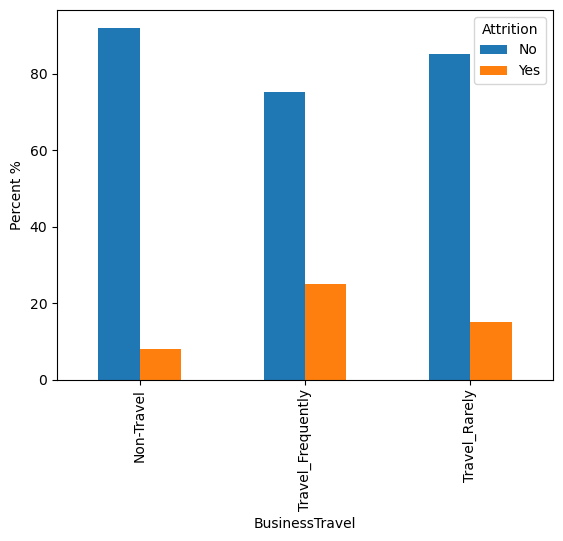

In [44]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_bt_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [45]:
attr_bt

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [46]:
# Chi-Squared test

stats.chi2_contingency(attr_bt)

Chi2ContingencyResult(statistic=24.182413685655174, pvalue=5.608614476449931e-06, dof=2, expected_freq=array([[125.81632653,  24.18367347],
       [232.34081633,  44.65918367],
       [874.84285714, 168.15714286]]))

In [47]:
c, p, dof, expected = stats.chi2_contingency(attr_bt)

p.round(2)

0.0

The type of business travel appears to have a significant effect on attrition.

### 9. Check if Job Satisfaction influence Attrition

In [48]:
attr_js = pd.crosstab(index=df['Attrition'], columns=df['JobSatisfaction'])
attr_js

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


In [49]:
attr_js_prop = pd.crosstab(index=df['Attrition'], columns=df['JobSatisfaction'],normalize='index')*100
attr_js_prop.round()

JobSatisfaction,1,2,3,4
Attrition,,,,
No,18.0,19.0,30.0,33.0
Yes,28.0,19.0,31.0,22.0


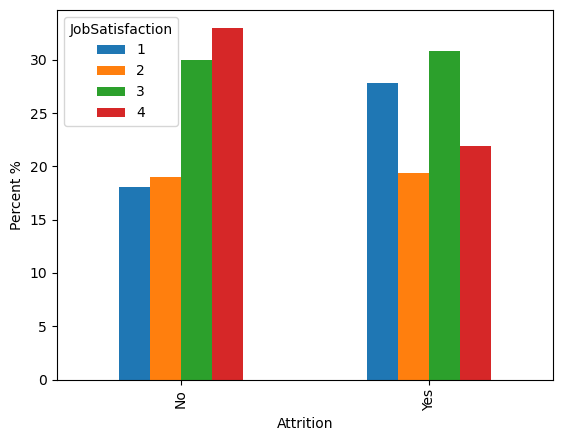

In [50]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_js_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [51]:
# Chi-Squared test

stats.chi2_contingency(attr_js)

Chi2ContingencyResult(statistic=17.505077010348, pvalue=0.0005563004510387556, dof=3, expected_freq=array([[242.40612245, 234.85714286, 370.73877551, 384.99795918],
       [ 46.59387755,  45.14285714,  71.26122449,  74.00204082]]))

In [52]:
c, p, dof, expected = stats.chi2_contingency(attr_js)

p.round(2)

0.0

 Job satisfaction appears to have a significant influence on attrition

### 10. Check if Department influence Attrition

In [53]:
attr_Dept = pd.crosstab(index=df['Attrition'], columns=df['Department'])
attr_Dept

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [54]:
attr_Dept_prop = pd.crosstab(index=df['Attrition'], columns=df['Department'],normalize='index')*100
attr_Dept_prop.round()

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,4.0,67.0,29.0
Yes,5.0,56.0,39.0


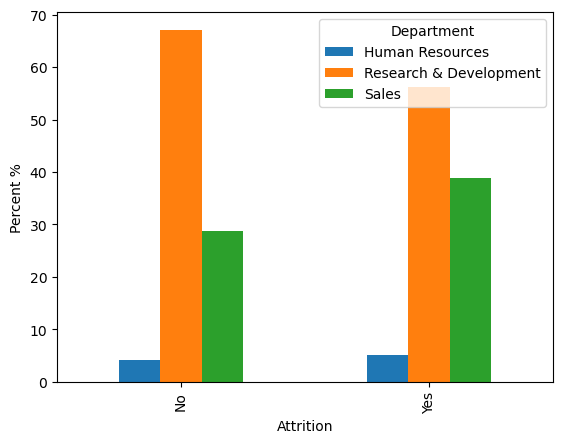

In [55]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_Dept_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [56]:
# Chi-Squared test

stats.chi2_contingency(attr_Dept)

Chi2ContingencyResult(statistic=10.79600732241067, pvalue=0.004525606574479633, dof=2, expected_freq=array([[ 52.84285714, 806.06326531, 374.09387755],
       [ 10.15714286, 154.93673469,  71.90612245]]))

In [57]:
c, p, dof, expected = stats.chi2_contingency(attr_Dept)

p.round(2)

0.0

Department appears to have a significant influence on attrition

### 11. Does Education affected attrition?

In [58]:
attr_Edu = pd.crosstab(index=df['Attrition'], columns=df['Education'])
attr_Edu

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [59]:
attr_Edu_prop = pd.crosstab(index=df['Attrition'], columns=df['Education'],normalize='index')*100
attr_Edu_prop.round()

Education,1,2,3,4,5
Attrition,,,,,
No,11.0,19.0,38.0,28.0,3.0
Yes,13.0,19.0,42.0,24.0,2.0


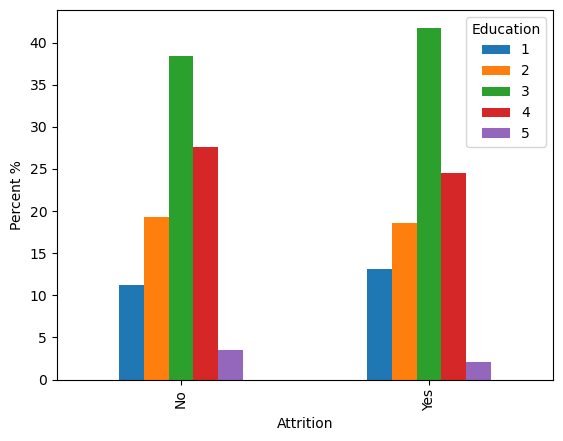

In [60]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_Edu_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [61]:
# Chi-Squared test

stats.chi2_contingency(attr_Edu)

Chi2ContingencyResult(statistic=3.0739613982367193, pvalue=0.5455253376565949, dof=4, expected_freq=array([[142.59183673, 236.53469388, 479.77959184, 333.83265306,
         40.26122449],
       [ 27.40816327,  45.46530612,  92.22040816,  64.16734694,
          7.73877551]]))

In [62]:
c, p, dof, expected = stats.chi2_contingency(attr_Edu)

p.round(2)

0.55

Education don't have significant affect attrition

### 12. Check if Education Field have significant affect to attrition

In [63]:
attr_EduF = pd.crosstab(index=df['Attrition'], columns=df['EducationField'])
attr_EduF

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


In [64]:
attr_EduF_prop = pd.crosstab(index=df['Attrition'], columns=df['EducationField'],normalize='index')*100
attr_EduF_prop.round()

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,2.0,42.0,10.0,33.0,6.0,8.0
Yes,3.0,38.0,15.0,27.0,5.0,14.0


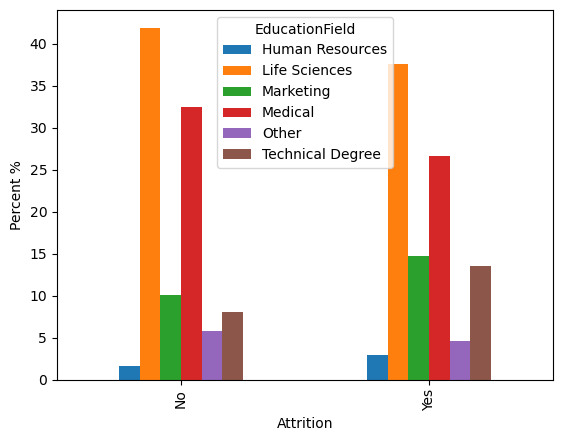

In [65]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_EduF_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [66]:
# Chi-Squared test

stats.chi2_contingency(attr_EduF)

Chi2ContingencyResult(statistic=16.024674119585423, pvalue=0.006773980139025222, dof=5, expected_freq=array([[ 22.64693878, 508.29795918, 133.36530612, 389.19183673,
         68.77959184, 110.71836735],
       [  4.35306122,  97.70204082,  25.63469388,  74.80816327,
         13.22040816,  21.28163265]]))

In [67]:
c, p, dof, expected = stats.chi2_contingency(attr_EduF)

p.round(2)

0.01

The field of education appears to have a significant effect on attrition in your dataset

### 13. Does Environment Satisfaction can give impact on Attrition?

In [68]:
attr_Env = pd.crosstab(index=df['Attrition'], columns=df['EnvSatisfaction'])
attr_Env

EnvSatisfaction,1,2,3,4
Attrition,,,,
No,212,244,391,386
Yes,72,43,62,60


In [69]:
attr_Env_prop = pd.crosstab(index=df['Attrition'], columns=df['EnvSatisfaction'],normalize='index')*100
attr_Env_prop.round()

EnvSatisfaction,1,2,3,4
Attrition,,,,
No,17.0,20.0,32.0,31.0
Yes,30.0,18.0,26.0,25.0


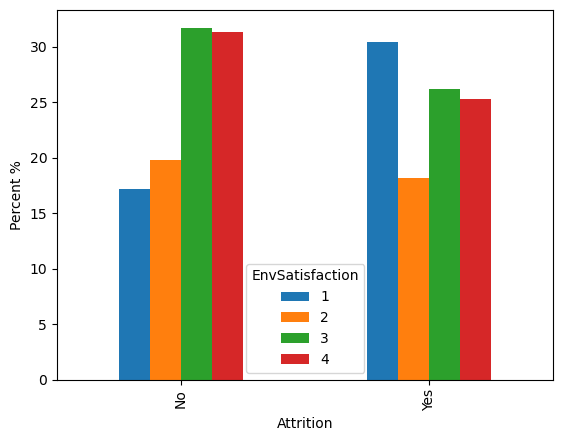

In [70]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_Env_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [71]:
# Chi-Squared test

stats.chi2_contingency(attr_Env)

Chi2ContingencyResult(statistic=22.503881435842295, pvalue=5.1234689062894205e-05, dof=3, expected_freq=array([[238.2122449 , 240.72857143, 379.96530612, 374.09387755],
       [ 45.7877551 ,  46.27142857,  73.03469388,  71.90612245]]))

In [72]:
c, p, dof, expected = stats.chi2_contingency(attr_Env)

p.round(2)

0.0

The level of satisfaction with the work environment appears to have a significant impact on attrition

### 14. Check if Gender also affected the attrition

In [73]:
attr_Gd = pd.crosstab(index=df['Attrition'], columns=df['Gender'])
attr_Gd

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [74]:
attr_Gd_prop = pd.crosstab(index=df['Attrition'], columns=df['Gender'],normalize='index')*100
attr_Gd_prop.round()

Gender,Female,Male
Attrition,,
No,41.0,59.0
Yes,37.0,63.0


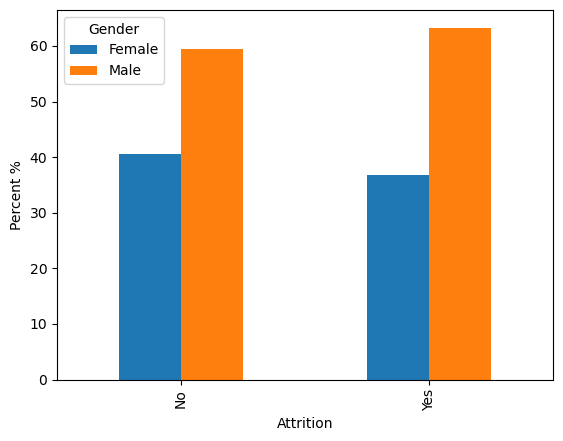

In [75]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_Gd_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [76]:
# Chi-Squared test

stats.chi2_contingency(attr_Gd)

c, p, dof, expected = stats.chi2_contingency(attr_Gd)

p.round(2)

0.29

Attrition not affected by gender

### 15. Attrition vs Job Role

In [77]:
attr_jr = pd.crosstab(index=df['Attrition'], columns=df['JobRole'])
attr_jr

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


In [78]:
attr_jr_prop = pd.crosstab(index=df['Attrition'], columns=df['JobRole'],normalize='index')*100
attr_jr_prop.round()

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,10.0,3.0,16.0,8.0,11.0,6.0,20.0,22.0,4.0
Yes,4.0,5.0,26.0,2.0,4.0,1.0,20.0,24.0,14.0


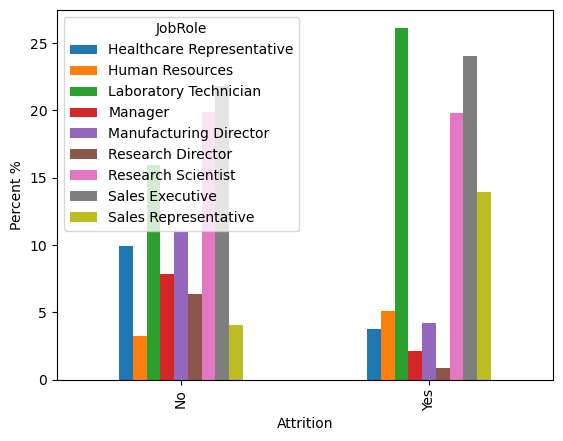

In [79]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_jr_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [80]:
# Chi-Squared test

stats.chi2_contingency(attr_jr)

c, p, dof, expected = stats.chi2_contingency(attr_jr)

p.round(2)

0.0

The job role appears to have a significant impact on attrition

### 16. Attrition vs Marital Status

In [81]:
attr_ms = pd.crosstab(index=df['Attrition'], columns=df['MaritalStatus'])
attr_ms

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


In [82]:
attr_ms_prop = pd.crosstab(index=df['Attrition'], columns=df['MaritalStatus'],normalize='index')*100
attr_ms_prop.round()

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,24.0,48.0,28.0
Yes,14.0,35.0,51.0


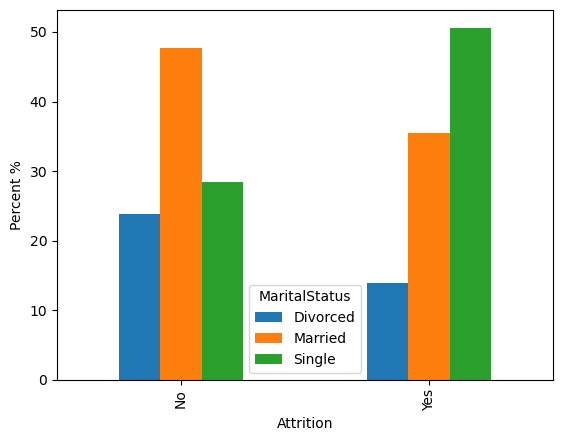

In [83]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_ms_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [84]:
# Chi-Squared test

stats.chi2_contingency(attr_ms)

c, p, dof, expected = stats.chi2_contingency(attr_ms)

p.round(2)

0.0

The marital status appears to have a significant influence on attrition

### 17. Attrition vs Performance Rating

In [85]:
attr_Pr = pd.crosstab(index=df['Attrition'], columns=df['PerformanceRating'])
attr_Pr

PerformanceRating,3,4
Attrition,,
No,1044,189
Yes,200,37


In [86]:
attr_Pr_prop = pd.crosstab(index=df['Attrition'], columns=df['PerformanceRating'],normalize='index')*100
attr_Pr_prop.round()

PerformanceRating,3,4
Attrition,,
No,85.0,15.0
Yes,84.0,16.0


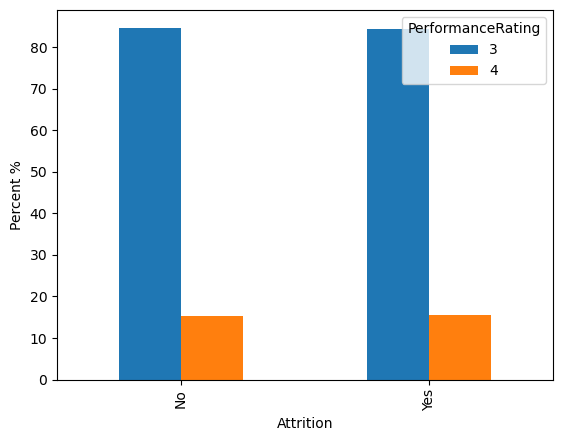

In [87]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_Pr_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [88]:
# Chi-Squared test

stats.chi2_contingency(attr_Pr)

c, p, dof, expected = stats.chi2_contingency(attr_Pr)

p.round(2)

0.99

The Performance Rating has no significant affects on Attrition.

### 18. Attrition vs over time

In [89]:
df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No


In [90]:
attr_OT = pd.crosstab(index=df['Attrition'], columns=df['OverTime'])
attr_OT

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


In [91]:
attr_OT_prop = pd.crosstab(index=df['Attrition'], columns=df['OverTime'],normalize='index')*100

attr_OT_prop.round()

OverTime,No,Yes
Attrition,,
No,77.0,23.0
Yes,46.0,54.0


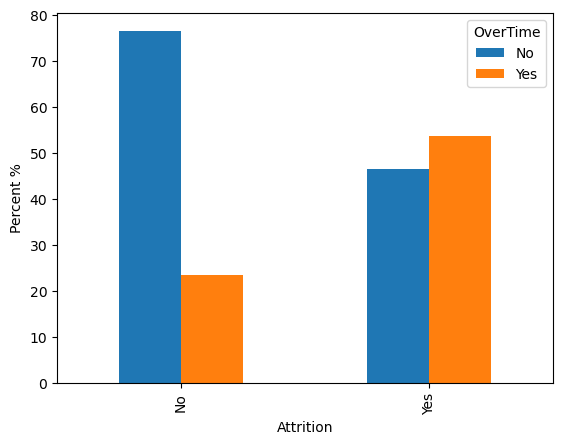

In [92]:
# Transfer Cross Tabulation Table to Cross Tabulation Bar Chart

#Plot a Bar Chart
attr_OT_prop.plot(kind='bar')

plt.ylabel('Percent %')
plt.show()

In [93]:
# Chi-Squared test

stats.chi2_contingency(attr_OT)

c, p, dof, expected = stats.chi2_contingency(attr_OT)

p.round(2)

0.0

The working overtime appears to have significant influence on attrition

### Summary of EDA findings for Multivariate Analysis
Variables that affecting the response variable, Attrition are listed as follows:

- Age
- BusinessTravel
- MonthlyIncome
- JobSatisfaction
- Bonus
- Department
- DistanceFromHome
- EducationField
- EnvSatisfaction
- JobRole
- MaritalStatus
- TrainingTimesLastYear
- YearsAtCompany
- OverTime

## C: Create DataFrame for Variables of Interest
#### Variable Selection

In [94]:
#Create DataFrame with variable of interest only

df = df[['Age','BusinessTravel','MonthlyIncome','JobSatisfaction','Bonus','Department','DistanceFromHome',
         'EducationField','EnvSatisfaction','JobRole','MaritalStatus','TrainingTimesLastYear',
         'YearsAtCompany','OverTime','Attrition']]

#Remove Unrelated variable

df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EducationField,EnvSatisfaction,JobRole,MaritalStatus,TrainingTimesLastYear,YearsAtCompany,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,Life Sciences,2,Sales Executive,Single,0,6,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,Life Sciences,3,Research Scientist,Married,3,10,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,Other,4,Laboratory Technician,Single,3,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,Life Sciences,4,Research Scientist,Married,3,8,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,Medical,1,Laboratory Technician,Married,3,2,No,No


In [95]:
df.shape

(1470, 15)

##  D. Assign Input and Output

In [96]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [97]:
x.shape

(1470, 14)

In [98]:
y.head()

EmployeeID
1    Yes
2     No
4    Yes
5     No
7     No
Name: Attrition, dtype: object

## E. Handling Categorical Features
- Transform Input variable that containing categorical variable ONLY

In [99]:
# Handling Categorical Input Variable

x = pd.get_dummies(x,drop_first=True)

In [100]:
x.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,41,5993,4,17979,1,2,0,6,False,True,...,False,False,False,False,False,True,False,False,True,True
2,49,5130,2,20520,8,3,3,10,True,False,...,False,False,False,False,True,False,False,True,False,False
4,37,2090,3,6270,2,4,3,0,False,True,...,True,False,False,False,False,False,False,False,True,True
5,33,2909,3,8727,3,4,3,8,True,False,...,False,False,False,False,True,False,False,True,False,True
7,27,3468,2,10404,2,1,3,2,False,True,...,True,False,False,False,False,False,False,True,False,False


In [101]:
df.shape

(1470, 15)

## F: Dataset Partitioning (Partitioning the response/output variable)

- STRATIFIED SAMPLING

In [102]:
attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [103]:
#Lets Partitioning Dataset using Stratified Sampling based on Response Variable
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify = y)

In [104]:
y_test.value_counts()

Attrition
No     247
Yes     47
Name: count, dtype: int64

In [105]:
y_train.value_counts()

Attrition
No     986
Yes    190
Name: count, dtype: int64

## G: Input Features Scaling/Standardization

In [106]:
#Inputs scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train) 
#Compute the scaler parameters

x_train = scaler.transform(x_train) 
#Apply and transform the inputs into standardize value

In [107]:
x_train

array([[ 1.62586005,  2.62759309,  0.27573851, ..., -0.918292  ,
         1.44171219,  1.56806362],
       [-0.32938399, -0.08356796,  0.27573851, ..., -0.918292  ,
         1.44171219, -0.63772923],
       [ 1.62586005,  0.39968402, -0.62751633, ..., -0.918292  ,
         1.44171219,  1.56806362],
       ...,
       [ 0.32236402, -0.48166355, -0.62751633, ...,  1.08897824,
        -0.69361972, -0.63772923],
       [-0.00350998,  0.60691186,  0.27573851, ...,  1.08897824,
        -0.69361972, -0.63772923],
       [ 0.21373936,  1.18056384,  1.17899336, ..., -0.918292  ,
        -0.69361972, -0.63772923]])

## H: Algorithm Training using Train Set
Model Classification Algorithm:
- Logistic Regression
- Naive Bayes

In [108]:
#Train the logistic model regression algorithm from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression

class_model = LogisticRegression(random_state=0)

class_model.fit(x_train,y_train) 

LogisticRegression(random_state=0)

#Train the Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB

class_model = GaussianNB()
class_model.fit(x_train,y_train)

In [109]:
class_model

LogisticRegression(random_state=0)

In [110]:
x_test

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1256,49,18711,3,56133,4,1,2,1,False,True,...,False,True,False,False,False,False,False,True,False,False
844,27,12808,4,38424,5,3,3,9,False,True,...,False,False,False,True,False,False,False,False,False,True
927,41,2778,4,8334,2,2,1,7,False,True,...,True,False,False,False,False,False,False,False,False,True
1200,44,2936,3,8808,10,3,4,6,False,True,...,False,False,False,False,True,False,False,False,True,True
1497,29,8620,3,25860,19,3,3,10,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,53,7525,2,22575,2,3,2,15,True,False,...,False,False,False,False,False,True,False,True,False,False
564,29,11935,3,35805,3,2,2,10,False,True,...,False,False,False,True,False,False,False,True,False,False
1215,50,17856,1,71424,2,4,3,2,True,False,...,False,True,False,False,False,False,False,True,False,False


## I: Apply Model with Scaled Input from Test Set

In [111]:
#Scaling the input from test set using computed scaler parameter

x_test = scaler.transform(x_test) #Scaler is parameter that we already complete earlier using Train Set

In [112]:
x_test

array([[ 1.29998604,  2.5527142 ,  0.27573851, ...,  1.08897824,
        -0.69361972, -0.63772923],
       [-1.08975667,  1.31459076,  1.17899336, ..., -0.918292  ,
        -0.69361972,  1.56806362],
       [ 0.43098869, -0.7891494 ,  1.17899336, ..., -0.918292  ,
        -0.69361972,  1.56806362],
       ...,
       [ 1.40861071,  2.37338242, -1.53077118, ...,  1.08897824,
        -0.69361972, -0.63772923],
       [ 1.84310938, -0.44055358, -1.53077118, ..., -0.918292  ,
         1.44171219,  1.56806362],
       [-1.08975667, -0.88080787, -1.53077118, ..., -0.918292  ,
        -0.69361972, -0.63772923]])

In [113]:
#Apply the scale x_test into Model (class_model)
y_pred = class_model.predict(x_test)

In [114]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(5)

,Actual,Predicted
EmployeeID,,
1256,No,No
844,No,No
927,Yes,No
1200,Yes,No
1497,No,No


## J: Performance Validation using Confusion Matrix

In [115]:
# Confusion Matrix
print(pd.crosstab(y_pred,y_test))

Attrition   No  Yes
row_0              
No         244   41
Yes          3    6


In [116]:
# Model Accuracy
#Print the performance Summary of Classification Model
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test,y_pred=y_pred))


              precision    recall  f1-score   support

          No       0.86      0.99      0.92       247
         Yes       0.67      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.76      0.56      0.57       294
weighted avg       0.83      0.85      0.80       294



#### Logistic Regression
- Accuracy of the Logistic Regression model is 85%
- Precision of Yes for Logistic Regression model is 67%
- Precision of No for Logistic Regression model is 86%
#### Naive Bayes
- Accuracy of the model Naive Bayes is 70%
- Precision of Yes for Naive Bayes is 27%
- Precision of No for Naive Bayes is 89%